# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import (
    balanced_accuracy_1interval_score,
    mean_absolute_1interval_error,
)

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the tuning of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/weather.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [
    make_scorer(balanced_accuracy_1interval_score),
    make_scorer(mean_absolute_1interval_error, greater_is_better=False),
]

X = pd.read_csv("../assets/data/processed/weather_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.32472154528972713
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.7198885576670615
              precision    recall  f1-score   support

           1       0.54      0.92      0.68       252
           2       0.63      0.65      0.64       252
           3       0.45      0.37      0.41       252
           4       0.42      0.46      0.44       252
           5       0.35      0.40      0.37       252
           6       0.29      0.44      0.35       252
           7       0.26      0.40      0.31       252
           8       0.29      0.35      0.32       252
           9       0.27      0.27      0.27       252
          10       0.24      0.25      0.25       252
          11       0.23      0.24      0.23       252
          12       0.21      0.29      0.24       252
          13       0.23      0.25      0.24       252
          14

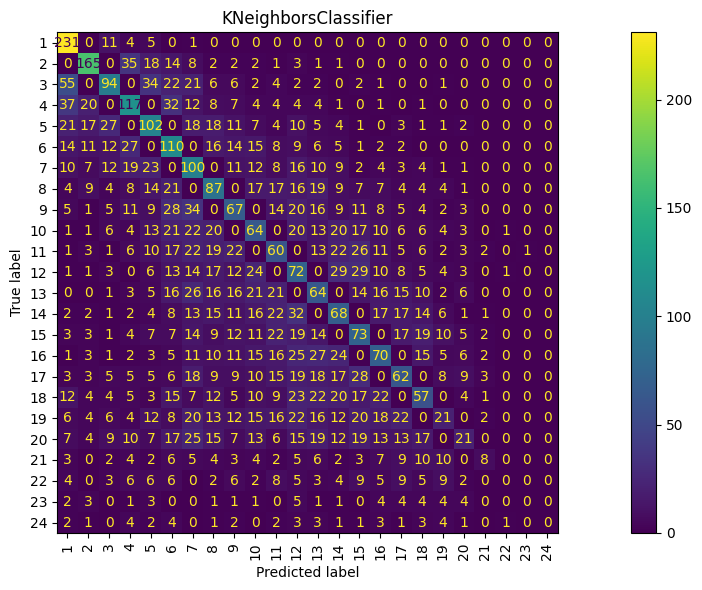

In [3]:
X_selected = X[
    [
        "positionGrid",
        "constructorRef",
        "driverWins",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
    ]
]
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X_selected, y, tscv, scorers=scorers, interval=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.285110310564856
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -4.166335331730336
              precision    recall  f1-score   support

           1       0.54      0.82      0.65       252
           2       0.53      0.62      0.58       252
           3       0.39      0.36      0.38       252
           4       0.39      0.33      0.36       252
           5       0.26      0.29      0.27       252
           6       0.24      0.38      0.29       252
           7       0.22      0.34      0.27       252
           8       0.21      0.28      0.24       252
           9       0.24      0.25      0.25       252
          10       0.19      0.28      0.23       252
          11       0.25      0.34      0.29       252
          12       0.21      0.29      0.25       252
          13       0.26      0.28      0.27       252
          14   

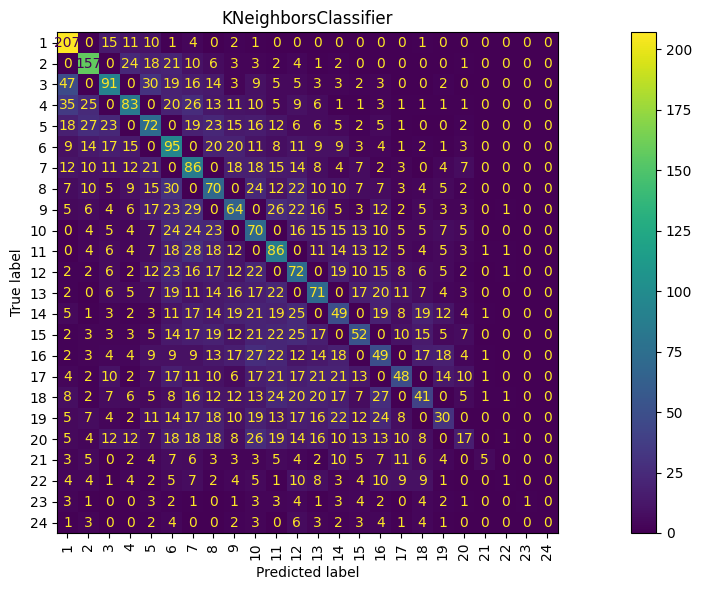

In [4]:
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3548601840079113
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.5464002570189184
              precision    recall  f1-score   support

           1       0.70      0.87      0.77       252
           2       0.66      0.75      0.70       252
           3       0.48      0.64      0.55       252
           4       0.40      0.57      0.47       252
           5       0.40      0.40      0.40       252
           6       0.43      0.40      0.42       252
           7       0.23      0.36      0.28       252
           8       0.36      0.35      0.35       252
           9       0.18      0.28      0.22       252
          10       0.45      0.29      0.35       252
          11       0.21      0.29      0.24       252
          12       0.20      0.33      0.25       252
          13       0.34      0.19      0.24       252
          14       0.58      0.31 

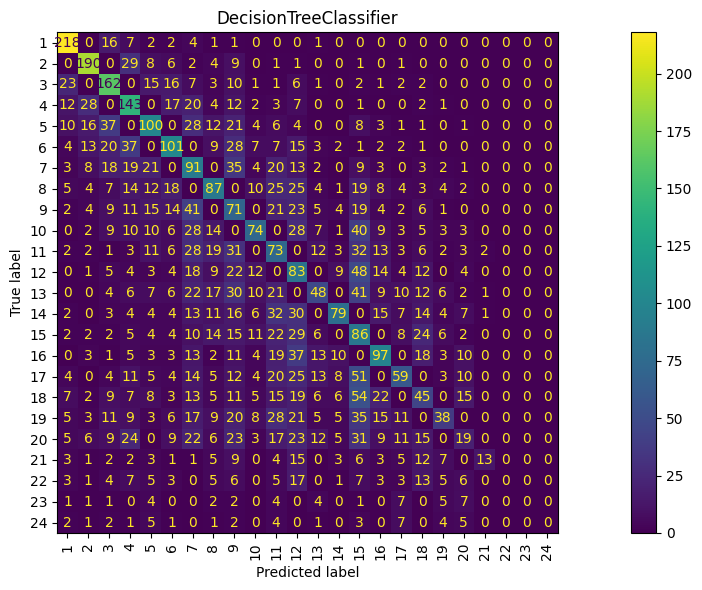

In [5]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitLocation",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "q1",
        "q2",
        "q3",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, interval=1)

DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3387145934873207
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.6353953841551254
              precision    recall  f1-score   support

           1       0.69      0.83      0.76       252
           2       0.57      0.69      0.63       252
           3       0.54      0.60      0.57       252
           4       0.37      0.53      0.44       252
           5       0.35      0.38      0.37       252
           6       0.44      0.42      0.43       252
           7       0.22      0.37      0.28       252
           8       0.37      0.29      0.33       252
           9       0.21      0.26      0.23       252
          10       0.31      0.27      0.29       252
          11       0.23      0.38      0.29       252
          12       0.17      0.38      0.23       252
          13       0.48      0.24      0.32       252
          14       0.31      0.26 

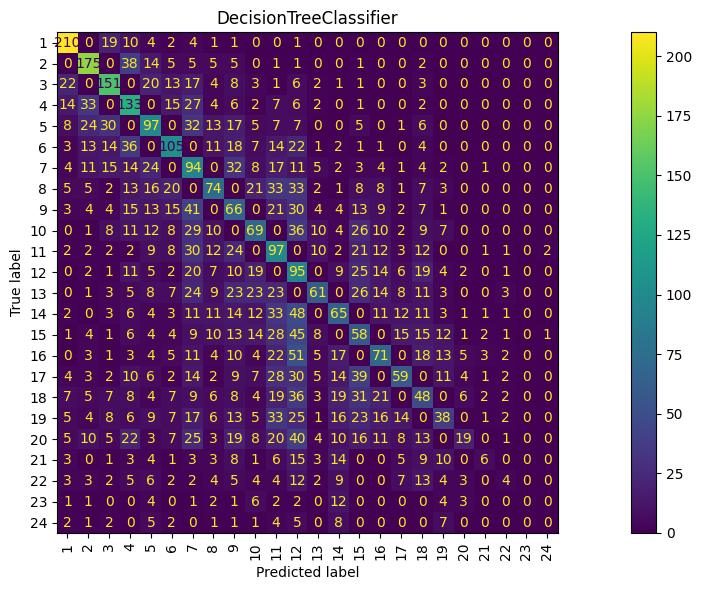

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3547357314402769
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.521986448635723
              precision    recall  f1-score   support

           1       0.56      0.92      0.70       252
           2       0.65      0.80      0.72       252
           3       0.49      0.63      0.55       252
           4       0.39      0.52      0.44       252
           5       0.44      0.40      0.42       252
           6       0.26      0.39      0.31       252
           7       0.35      0.39      0.37       252
           8       0.39      0.25      0.30       252
           9       0.23      0.21      0.22       252
          10       0.31      0.25      0.27       252
          11       0.25      0.32      0.28       252
          12       0.20      0.37      0.26       252
          13       0.37      0.29      0.33       252
          14     

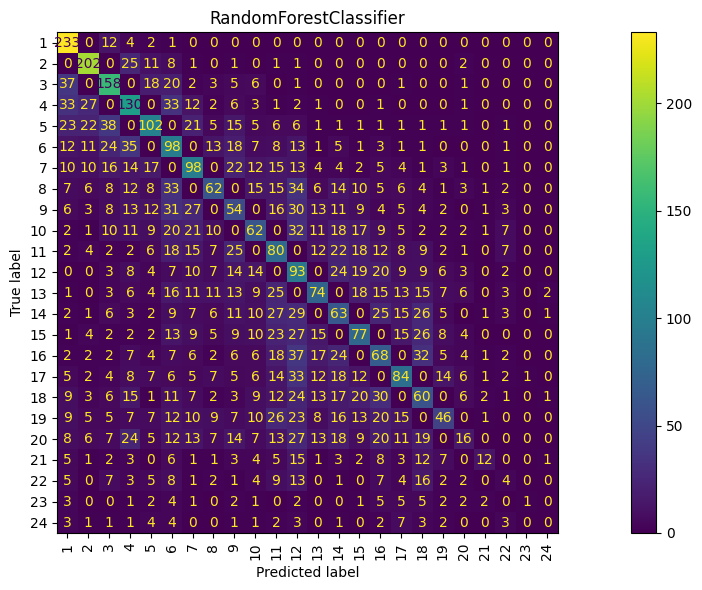

In [7]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "driverNationality",
        "constructorNationality",
        "grandPrix",
        "circuitRef",
        "driverWins",
        "constructorWins",
        "q1",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
    ]
]
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, interval=1)

RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.34294315532951897
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.6318046856873325
              precision    recall  f1-score   support

           1       0.54      0.94      0.69       252
           2       0.61      0.81      0.69       252
           3       0.46      0.62      0.52       252
           4       0.34      0.48      0.40       252
           5       0.41      0.36      0.38       252
           6       0.26      0.38      0.31       252
           7       0.29      0.36      0.32       252
           8       0.34      0.23      0.27       252
           9       0.19      0.17      0.18       252
          10       0.28      0.22      0.25       252
          11       0.24      0.29      0.26       252
          12       0.24      0.36      0.29       252
          13       0.28      0.31      0.29       252
          14   

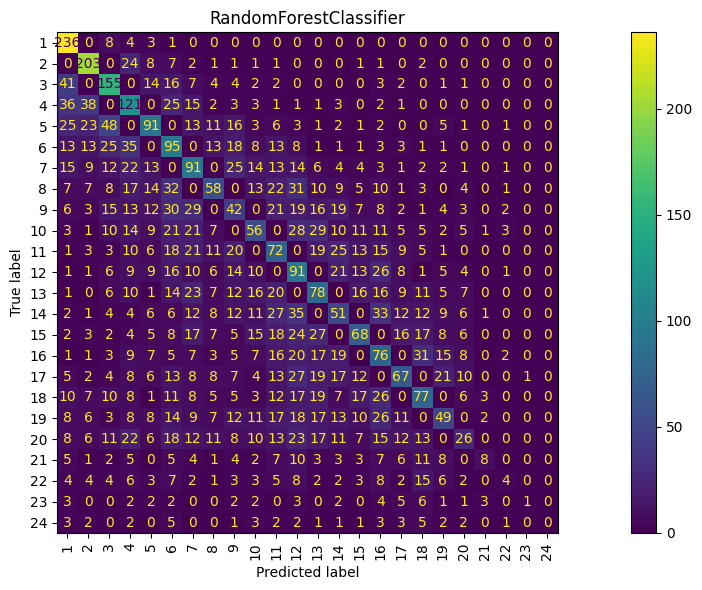

In [8]:
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3570698535471263
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.4423201653827786
              precision    recall  f1-score   support

           1       0.60      0.95      0.73       252
           2       0.60      0.76      0.67       252
           3       0.59      0.58      0.58       252
           4       0.43      0.49      0.46       252
           5       0.35      0.47      0.40       252
           6       0.33      0.47      0.39       252
           7       0.30      0.32      0.31       252
           8       0.47      0.28      0.35       252
           9       0.20      0.26      0.23       252
          10       0.35      0.36      0.36       252
          11       0.20      0.32      0.24       252
          12       0.24      0.31      0.27       252
          13       0.37      0.20      0.26       252


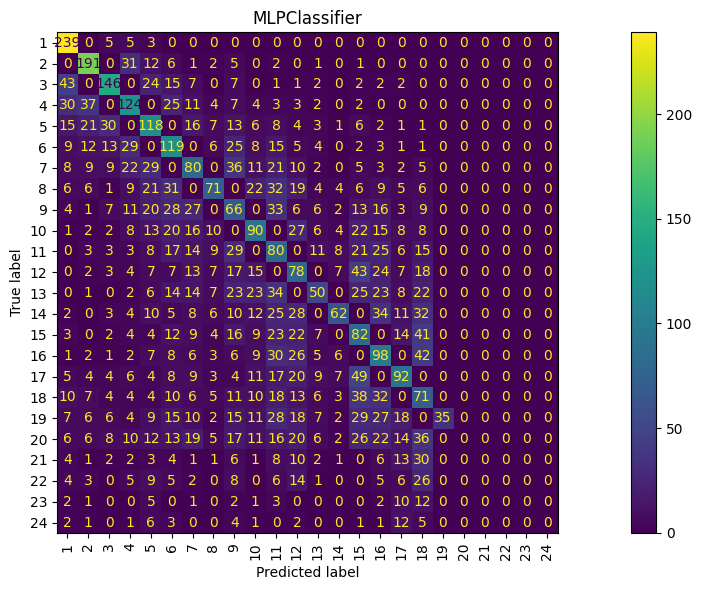

In [9]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "circuitRef",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "driverAgeToday",
        "driverAgeAtRace",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X_selected, y, tscv, scorers=scorers, interval=1)

MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3604800040027313
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.43984075667659
              precision    recall  f1-score   support

           1       0.62      0.92      0.75       252
           2       0.62      0.77      0.69       252
           3       0.59      0.56      0.58       252
           4       0.42      0.51      0.46       252
           5       0.40      0.51      0.45       252
           6       0.31      0.49      0.38       252
           7       0.31      0.42      0.36       252
           8       0.29      0.28      0.29       252
           9       0.33      0.27      0.29       252
          10       0.35      0.28      0.31       252
          11       0.19      0.30      0.23       252
          12       0.26      0.37      0.31       252
          13       0.24      0.26      0.25       252
  

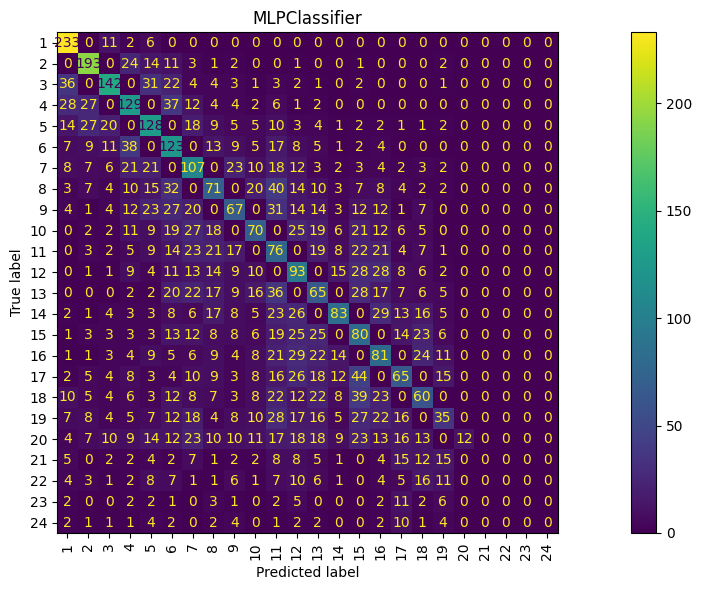

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X, y, tscv, scorers=scorers, interval=1)

## Results


Based on the model in the previous section, i.e. with optimised attributes, performance has not improved.

With all attributes, we have smoothly improved the performance of the model, except in knn since it is a model that is highly dependent on dimensionality (the others may discriminate attributes or give them less importance). Attribute selection could be done to improve knn, but the only significant improvement would be in this one, and it probably won't outperform the others.
